In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.model_selection import GridSearchCV, KFold

# модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# стандартизация
from sklearn.preprocessing import StandardScaler

# метрики
from sklearn.metrics import (r2_score)


import warnings
warnings.filterwarnings('ignore')

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
# MedInc       - median income in block group - медианный доход
# HouseAge     - median house age in block group - медианный возраст дома
# AveRooms     - average number of rooms per household - среднее количество комнат на домохозяйство
# AveBedrms    - average number of bedrooms per household - среднее количество спален на домохозяйство
# Population   - block group population - численность
# AveOccup     - average number of household members - среднее количество членов домохозяйства
# Latitude     - block group latitude - широта
# Longitude    - block group longitude - долгота

Анализ рынка недвижимости Калифорнии с использованием ансамблевых методов
Цель задания: Использовать набор данных fetch_california_housing для построения и анализа моделей машинного обучения с акцентом на ансамблевые методы.
Анализ и подготовка данных:

### 1. Загрузка и предварительный анализ данных:
Загрузите данные из предоставленного файла fetch_california_housing.xlsx.
Исследуйте структуру данных, проведите описательный анализ основных статистических показателей.

In [6]:
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)

In [7]:
df_housing['Target'] = housing.target

In [8]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
df_housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [11]:
df_housing.shape

(20640, 9)

In [12]:
df_housing.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [13]:
# проверим дубликаты
df_housing.duplicated().sum()

0

In [14]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


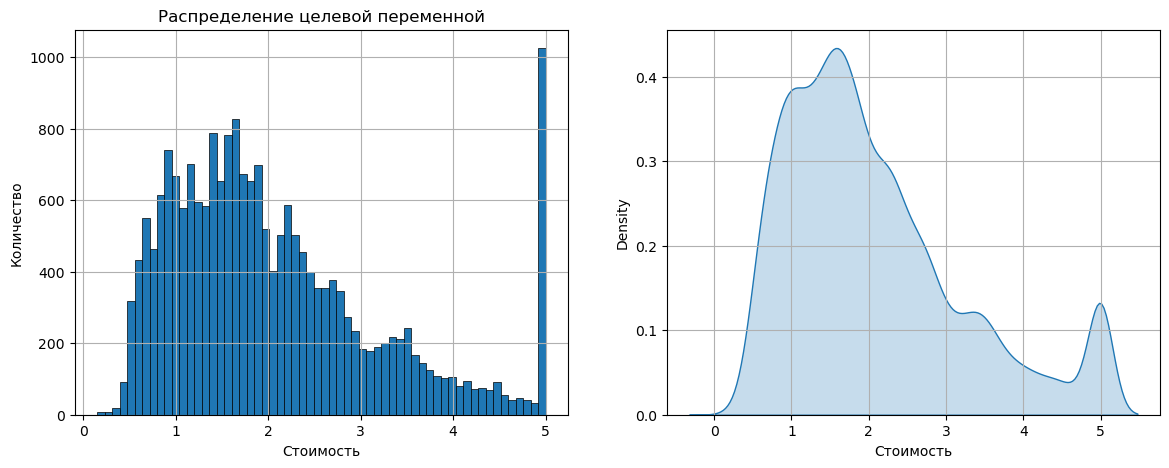

В целом нормальное распределение, но есть около 1000 объектов стоимость выше 500.000$


In [15]:
plt.figure(figsize=(14,5))
plt.subplot(121)
df_housing['Target'].hist(density=False, bins=60, linewidth=0.5, edgecolor='k')
plt.title('Распределение целевой переменной')
plt.ylabel('Количество')
plt.xlabel('Стоимость')
# plt.grid(False)
plt.subplot(122)
sns.kdeplot(df_housing['Target'], shade=True, legend=False)
plt.xlabel('Стоимость')
plt.grid()

plt.show()
print('В целом нормальное распределение, но есть около 1000 объектов стоимость выше 500.000$')

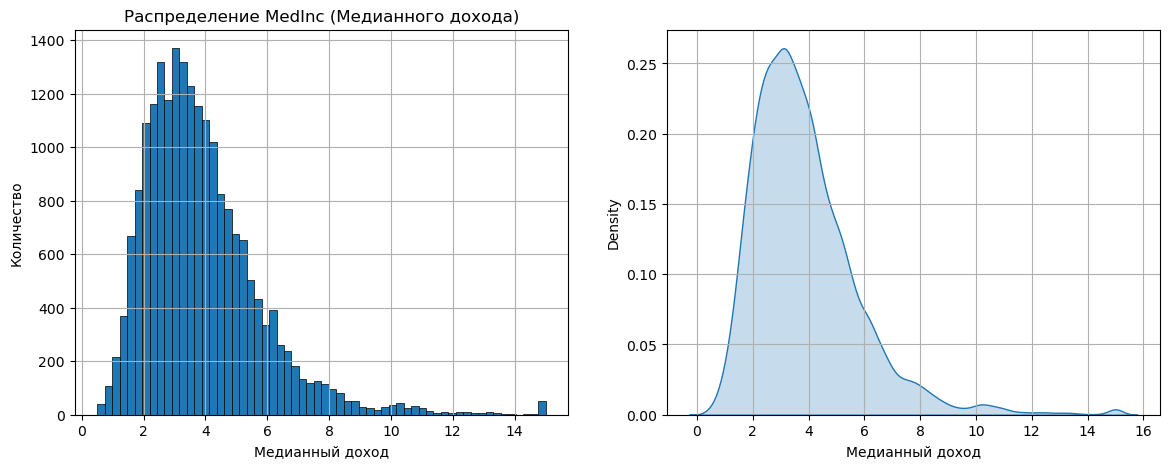

В целом нормальное распределение, есть небольшая группа людей, которые зарабатывают больше всех


In [16]:
plt.figure(figsize=(14,5))
plt.subplot(121)
df_housing['MedInc'].hist(density=False, bins=60, linewidth=0.5, edgecolor='k')
plt.title('Распределение MedInc (Медианного дохода)')
plt.ylabel('Количество')
plt.xlabel('Медианный доход')
# plt.grid(False)
plt.subplot(122)
sns.kdeplot(df_housing['MedInc'], shade=True, legend=False)
plt.xlabel('Медианный доход')
plt.grid()

plt.show()
print('В целом нормальное распределение, есть небольшая группа людей, которые зарабатывают больше всех')

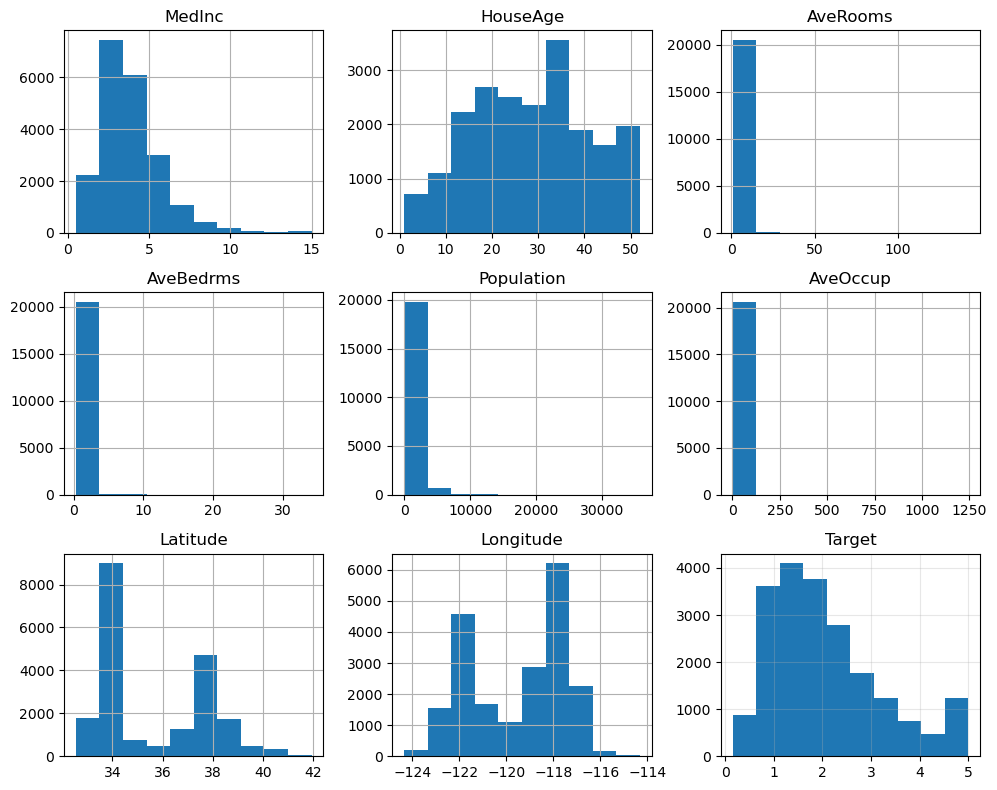

In [17]:
# Генерируем гистограммы для всех числовых столбцов в DataFrame
df_housing.hist(figsize=(10, 8), bins=10)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.grid(alpha=0.3)
plt.show()

#### Построим матрицу корреляции для выявления линейной зависимоти

In [18]:
# подготовим признаки
df_corr = df_housing.select_dtypes(include=('float64'))

In [19]:
corr_matrix = df_corr.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

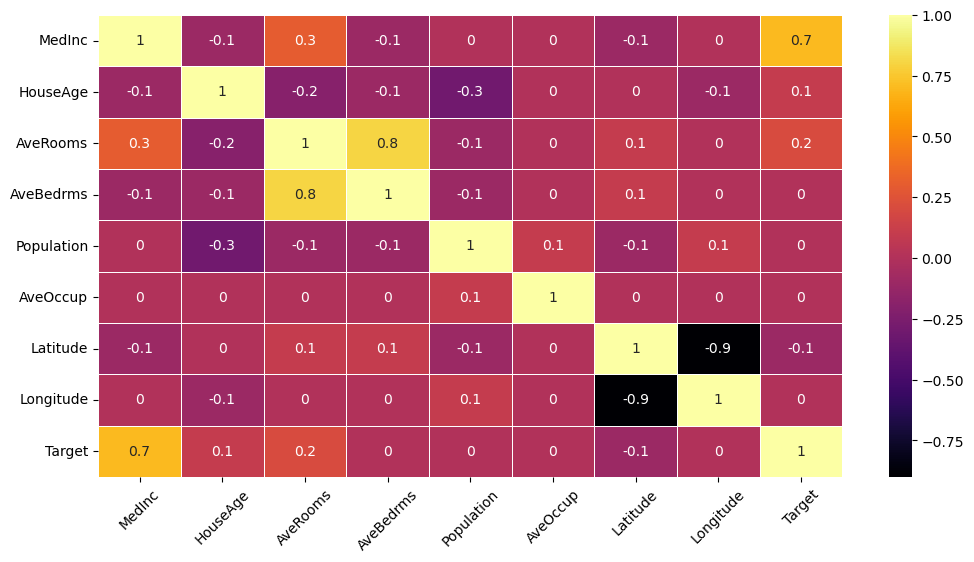

In [20]:
plt.figure(figsize=(12, 6))

sns.heatmap(corr_matrix, annot=True, linewidths=0.7, cmap='inferno')
plt.xticks(rotation=45)
#plt.yticks(rotation=35)
plt.show()

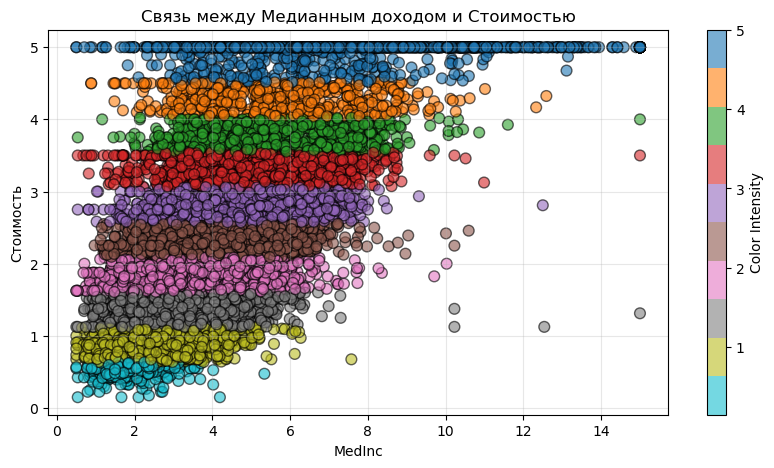

Чем больше Медианный доход, тем выше Стоимость


In [21]:
# Построение графика рассеивания
plt.figure(figsize=(10,5))
plt.scatter(data=df_housing, x=df_housing['MedInc'], c=df_housing['Target'], y='Target',alpha=0.6, linewidths=1, s=60, edgecolors='k', cmap='tab10_r')

plt.title('Связь между Медианным доходом и Стоимостью')
plt.xlabel('MedInc')
plt.ylabel('Стоимость')
plt.colorbar(label='Color Intensity')
plt.grid(alpha=0.3)

plt.show()
print('Чем больше Медианный доход, тем выше Стоимость')

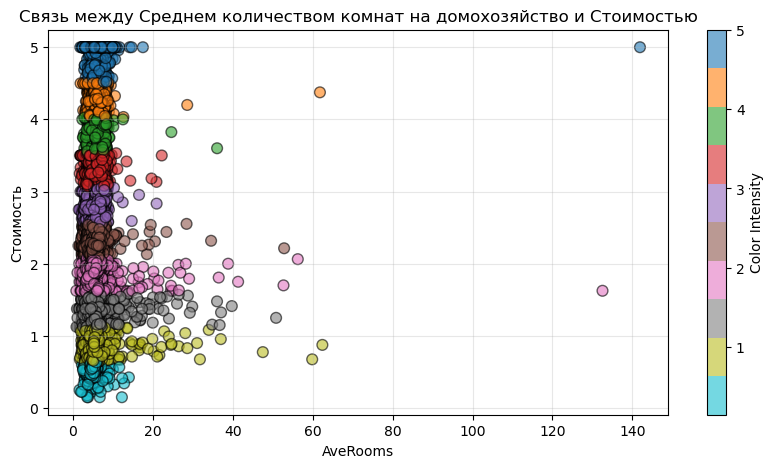

Чем больше Количество комнат на домохозяйство, тем выше Стоимость


In [22]:
# Построение графика рассеивания
plt.figure(figsize=(10,5))
plt.scatter(data=df_housing, x=df_housing['AveRooms'], c=df_housing['Target'], y='Target',alpha=0.6, linewidths=1, s=60, edgecolors='k', cmap='tab10_r')

plt.title('Связь между Среднем количеством комнат на домохозяйство и Стоимостью')
plt.xlabel('AveRooms')
plt.ylabel('Стоимость')
plt.colorbar(label='Color Intensity')
plt.grid(alpha=0.3)

plt.show()
print('Чем больше Количество комнат на домохозяйство, тем выше Стоимость')

### 3. Построение моделей:
* Разделите данные на обучающую и тестовую выборки.
* Постройте и обучите модели RandomForestRegressor и GradientBoostingRegressor.
* Постарайтесь оптимизировать их гиперпараметры для улучшения результатов на обучающей выборке.

In [23]:
df_housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [24]:
X = df_housing.drop('Target', axis=1)
Y = df_housing['Target']
# X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [25]:
%%time
gr_boost_model = GradientBoostingRegressor(random_state=42)
gr_boost_model.fit(X_train, y_train)

print(f'r2_score_trian: {gr_boost_model.score(X_train, y_train)}')
print(f'r2_score_test: {gr_boost_model.score(X_test, y_test)}')

r2_score_trian: 0.8048978817773166
r2_score_test: 0.7756446042829697
CPU times: user 5.25 s, sys: 724 µs, total: 5.26 s
Wall time: 5.26 s


In [26]:
%%time
rand_forest_model = RandomForestRegressor(n_jobs=100, random_state=42) 
rand_forest_model.fit(X_train, y_train)

print(f'r2_score_trian: {rand_forest_model.score(X_train, y_train)}')
print(f'r2_score_test: {rand_forest_model.score(X_test, y_test)}')

r2_score_trian: 0.9735726320302575
r2_score_test: 0.8051230593157366
CPU times: user 24.1 s, sys: 413 ms, total: 24.6 s
Wall time: 1.83 s


In [27]:
models = []

In [28]:
models.append(gr_boost_model)
models.append(rand_forest_model)

In [29]:
models

[GradientBoostingRegressor(random_state=42),
 RandomForestRegressor(n_jobs=100, random_state=42)]

In [30]:
scores = []

for i, model in enumerate(models):
    
    clean_name_model = str(model).split('(')
    scores.append(

            {
                'model': clean_name_model[0],
                'n_estimators': model.n_estimators,
                'max_depth': model.max_depth,
                'train_r2_score': model.score(X_train, y_train),
                'test_r2_score': model.score(X_test, y_test)
            }
        )

In [31]:
result = pd.DataFrame(scores)
result

,model,n_estimators,max_depth,train_r2_score,test_r2_score
0,GradientBoostingRegressor,100,3.0,0.804898,0.775645
1,RandomForestRegressor,100,NaN,0.973573,0.805123


### Подбор гиперпараметров для улучшения результатов с помощью GridSearchCV и KFold

In [32]:
%%time

# Подбор гиперпараметров для улучшения результатов модели GradientBoostingRegressor

params = {'n_estimators': [50, 100, 200, 400],
          'max_depth': [3, 5, 7, 10]}

gs_gr_boost_model = GridSearchCV(gr_boost_model, 
                  params,
                  scoring='r2',
                  cv=KFold(n_splits=5, # колич. разбиений/итераций в кросс-валидации
                           random_state=42,
                           shuffle=True),
                  n_jobs=-1
                 )

gs_gr_boost_model.fit(X_train, y_train)

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9

CPU times: user 46.9 s, sys: 321 ms, total: 47.3 s
Wall time: 2min 47s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='r2')

In [33]:
gs_gr_boost_model.best_params_

{'max_depth': 7, 'n_estimators': 400}

In [34]:
gs_gr_boost_model.best_score_

0.8394973560385856

In [35]:
%%time
gr_boost_model_best = GradientBoostingRegressor(random_state=42, max_depth=7, n_estimators=400)
gr_boost_model_best.fit(X_train, y_train)

print(f'r2_score_trian: {gr_boost_model_best.score(X_train, y_train)}')
print(f'r2_score_test: {gr_boost_model_best.score(X_test, y_test)}')

r2_score_trian: 0.9767283082444547
r2_score_test: 0.8446545106652881
CPU times: user 47.4 s, sys: 6.08 ms, total: 47.4 s
Wall time: 47.4 s


In [36]:
%%time

# Подбор гиперпараметров для модели RandomForestRegressor

gs_rand_forest_model = GridSearchCV(rand_forest_model, 
                  params,
                  scoring='r2',
                  cv=KFold(n_splits=5, # колич. разбиений/итераций в кросс-валидации
                           random_state=42,
                           shuffle=True),
                  n_jobs=-1
                 )

gs_rand_forest_model.fit(X_train, y_train)

CPU times: user 52.6 s, sys: 752 ms, total: 53.3 s
Wall time: 1min 11s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=100, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='r2')

In [37]:
gs_rand_forest_model.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [38]:
gs_rand_forest_model.best_score_

0.7819148323508232

In [39]:
%%time
rand_forest_model_best = RandomForestRegressor(n_jobs=100, random_state=42, max_depth=10, n_estimators=400) 
rand_forest_model_best.fit(X_train, y_train)

print(f'r2_score_trian: {rand_forest_model_best.score(X_train, y_train)}')
print(f'r2_score_test: {rand_forest_model_best.score(X_test, y_test)}')

r2_score_trian: 0.8727463226885468
r2_score_test: 0.7753508650902807
CPU times: user 53.5 s, sys: 813 ms, total: 54.3 s
Wall time: 4.06 s


In [40]:
best_scores = []

for i, model in enumerate([gs_gr_boost_model, gs_rand_forest_model]):
    
    clean_name_model = str(model.estimator).split('(')
     
    best_scores.append(

            {
                'model': clean_name_model[0],
                    'n_estimators': model.best_params_['n_estimators'],
                    'max_depth': model.best_params_['max_depth'],
                'train_r2_score_cross_val': model.best_score_,
            }
        )

In [41]:
result = pd.DataFrame(best_scores)
result

,model,n_estimators,max_depth,train_r2_score_cross_val
0,GradientBoostingRegressor,400,7,0.839497
1,RandomForestRegressor,400,10,0.781915


### 4. Анализ важности признаков и выводы:
* Используйте атрибут feature_importances_ для оценки важности признаков в каждой модели.
* На основе полученных данных сделайте выводы о том, какие признаки наиболее значимы и почему.

In [42]:
print('Важность признаков для модели GradientBoostingRegressor')
feature_importances = pd.DataFrame(zip(gr_boost_model_best.feature_names_in_, gr_boost_model_best.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

Важность признаков для модели GradientBoostingRegressor


,feature_name,importance
0,MedInc,0.528142
5,AveOccup,0.132992
7,Longitude,0.107402
6,Latitude,0.104270
1,HouseAge,0.047888
2,AveRooms,0.036223
4,Population,0.021726
3,AveBedrms,0.021357


In [43]:
print('Важность признаков для модели RandomForestRegressor')
feature_importances = pd.DataFrame(zip(rand_forest_model_best.feature_names_in_, rand_forest_model_best.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

Важность признаков для модели RandomForestRegressor


,feature_name,importance
0,MedInc,0.593869
5,AveOccup,0.139913
6,Latitude,0.077038
7,Longitude,0.076457
1,HouseAge,0.047647
2,AveRooms,0.031004
4,Population,0.017246
3,AveBedrms,0.016825


In [44]:
# MedInc       - median income in block group - медианный доход
# HouseAge     - median house age in block group - медианный возраст дома
# AveRooms     - average number of rooms per household - среднее количество комнат на домохозяйство
# AveBedrms    - average number of bedrooms per household - среднее количество спален на домохозяйство
# Population   - block group population - численность
# AveOccup     - average number of household members - среднее количество членов домохозяйства
# Latitude     - block group latitude - широта
# Longitude    - block group longitude - долгота